In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('only_data.dat', names=['s2','dm','FAR','NEAR','ji'], delim_whitespace=True)

In [3]:
# Data from RENO collaboration
data_cl68 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl68.csv', delim_whitespace=True)
data_cl95 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl95.csv', delim_whitespace=True)
data_cl99 = pd.read_table('../reno_for_global_analysis/reno_data/reno2018_cl99.csv', delim_whitespace=True)

In [4]:
idx_min=data['ji'].idxmin()
idx_min

1011237

In [5]:
far_min = data['FAR'][idx_min]
near_min = data['NEAR'][idx_min]
dm_min = data['dm'][idx_min]
s2_min = data['s2'][idx_min]
ji_min = data['ji'][idx_min]

In [6]:
ji_min, far_min, near_min, dm_min, s2_min

(18.984225871340595,
 0.001602857142857149,
 0.0009314285714285694,
 0.0027,
 0.08885807111846919)

In [7]:
new_Data = data[(data['FAR'] == far_min) & (data['NEAR'] == near_min) ][['s2','dm','ji']]

In [8]:
new_Data.min()

s2     0.051411
dm     0.001557
ji    18.984226
dtype: float64

In [9]:
new_Data['ji']=new_Data['ji'] - ji_min

In [10]:
dat_68 = new_Data[new_Data['ji'] <= 2.3]#[['s2','dm']]
dat_95 = new_Data[new_Data['ji'] <= 6.2]#[['s2','dm']]
dat_99 = new_Data[new_Data['ji'] <= 11.8]#[['s2','dm']]

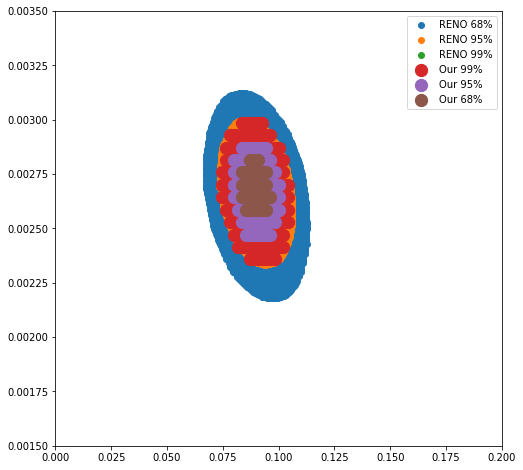

In [11]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data_cl68.s22t13, data_cl68.dmee, label='RENO 68%')
ax.scatter(data_cl95.s22t13, data_cl95.dmee, label='RENO 95%')
ax.scatter(data_cl99.s22t13, data_cl99.dmee, label='RENO 99%')
size=150
ax.scatter(dat_99.s2, dat_99.dm, s=size, label='Our 99%')
ax.scatter(dat_95.s2, dat_95.dm, s=size, label='Our 95%')
ax.scatter(dat_68.s2, dat_68.dm, s=size, label='Our 68%')

ax.set_xlim(0.0, 0.2)
#ax.set_xticks([0,0.05,0.1,0.15,0.2])

ax.set_ylim(0.0015, 0.0035)
#ax.set_yticks([0.002,0.0025,0.0030,0.0035])

ax.legend()

#fig.savefig("reno_data_only_best_fit_35x35.png")
plt.show()